In [13]:
# Importing the libraries
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#import csv

In [14]:
# Reading the Data file
df = pd.read_csv('imdb_master.csv',encoding='latin-1',error_bad_lines=False )
#df = pd.read_csv('imdb_master.csv',delimiter="\t", quoting=csv.QUOTE_NONE, encoding='latin-1')

print(df.head())

   Unnamed: 0  type  ... label         file
0           0  test  ...   neg      0_2.txt
1           1  test  ...   neg  10000_4.txt
2           2  test  ...   neg  10001_1.txt
3           3  test  ...   neg  10002_3.txt
4           4  test  ...   neg  10003_3.txt

[5 rows x 5 columns]


In [16]:
# Features and Target Extraction
sentences = df['review'].values
y = df['label'].values

In [17]:
# Tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [18]:
# getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [19]:
# Label Encoding the Target ,Splitting the data
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [20]:
input_dim=np.prod(X_train.shape[1:])
print(input_dim)

2000


In [21]:
# Model Implementation
model = Sequential()
model.add(layers.Dense(300,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 7s 100us/step - loss: 0.8807 - acc: 0.5037 - val_loss: 0.8432 - val_acc: 0.5097
Epoch 2/5
75000/75000 [==============================] - 7s 97us/step - loss: 0.7928 - acc: 0.5767 - val_loss: 0.8408 - val_acc: 0.5153
Epoch 3/5
75000/75000 [==============================] - 7s 96us/step - loss: 0.6896 - acc: 0.6762 - val_loss: 0.8646 - val_acc: 0.5183
Epoch 4/5
75000/75000 [==============================] - 7s 95us/step - loss: 0.4992 - acc: 0.8134 - val_loss: 0.9558 - val_acc: 0.5071
Epoch 5/5
75000/75000 [==============================] - 7s 97us/step - loss: 0.2911 - acc: 0.9228 - val_loss: 1.0713 - val_acc: 0.5054


In [22]:
# Model Evaluation
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

25000/25000 [==============================] - 2s 63us/step
Evaluation result on Test Data : Loss = 1.0712904376220702, accuracy = 0.5053600072860718


In [23]:
# Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


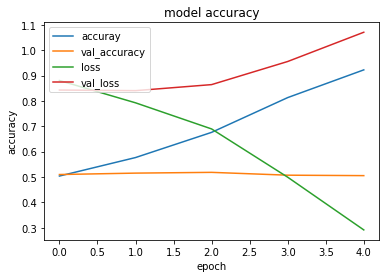

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [25]:
# Adding Embedding Layer
# Pre processing for Embedding Layer

from keras.preprocessing.sequence import pad_sequences
pureSentences = df['review'].values
max_review_len= max([len(s.split()) for s in pureSentences])
vocab_size= len(tokenizer.word_index)+1
sentencesPre = tokenizer.texts_to_sequences(pureSentences)
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len)

X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)
print(vocab_size)
print(max_review_len)

176408
2470


In [26]:
# Model implementation adding Embedding Layer
from keras.layers import Embedding, Flatten
m = Sequential()
m.add(Embedding(vocab_size, 50, input_length=max_review_len))
m.add(Flatten())
m.add(layers.Dense(300, activation='relu',input_dim=max_review_len))
m.add(layers.Dense(3, activation='softmax'))
m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history1=m.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Model Evaluation
[test_loss1, test_acc1] = m.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 75000 samples, validate on 25000 samples
Epoch 1/5
75000/75000 [==============================] - 490s 7ms/step - loss: 1.0259 - acc: 0.4838 - val_loss: 0.8732 - val_acc: 0.4969
Epoch 2/5
75000/75000 [==============================] - 490s 7ms/step - loss: 0.8013 - acc: 0.5671 - val_loss: 0.8723 - val_acc: 0.4948
Epoch 3/5
75000/75000 [==============================] - 491s 7ms/step - loss: 0.6674 - acc: 0.6713 - val_loss: 0.9582 - val_acc: 0.4875
Epoch 4/5
75000/75000 [==============================] - 492s 7ms/step - loss: 0.5108 - acc: 0.7707 - val_loss: 1.1432 - val_acc: 0.4819
Epoch 5/5
25000/25000 [==============================] - 52s 2ms/step
Evaluation result on Test Data : Loss = 1.4276225415420531, accuracy = 0.4803600013256073


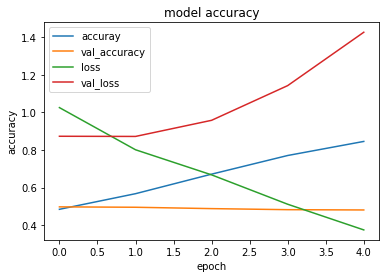

In [27]:
# Loss and Accuracy Curve after adding Embedding Layer
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper left')
plt.show()

In [28]:
pred = m.predict_classes(X_test[[2],:])
print("Actual Prediction",y_test[1],"Predicted Prediction", pred)

Actual Prediction 2 Predicted Prediction [2]
